<h3>Yanjie Zhou</h3>
<h3>Content Analysis
</h3>
<h3>Prof. Evans
</h3>
<h3>Jan 29th 2020
</h3>

In [3]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud_2020 #pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip
#For ML
import sklearn
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition

import nltk #For tokenizing and normalizing
import numpy as np #arrays
import matplotlib.pyplot as plt #Plots
import matplotlib.colors # For nice colours
import seaborn #Makes plots look nice, also heatmaps
import scipy as sp #for interp

#These are from the standard library
import collections
import os
import os.path
import random
import re
import glob
import pandas
import requests
import json
import math

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Go back through all of the cells above and generate 10 distinct artificial datasets and classify them with all of the available methods. Add a cell immediately below and describe which classifier(s) worked best with which artificially constructed data source and why. Then go through all of the empirical datasets (i.e., Newsgroups, Senate Small, Senate Large, Email Spam) and classify them with all available methods. Add a second cell immediately below and describe which classifier(s) worked best with which data set and why.

<span style="color:red">***Stretch*** (but also required) Wander through the SKLearn documentation available [here](http://scikit-learn.org/stable/), particularly perusing the classifiers. In cells following, identify and implement a new classifier that we have not yet used (e.g., AdaBoost, CART) on one artificial dataset and one real dataset (used above). Then, in the next cell describe the classifier, detail how it compares with the approaches above, and why it performed better or worse than others.

<h1>Artifcial Datasets</h1>
<p>I build ten artificial datasets as five distinct pairs with each pair following the same data pattern. The main difference between two elements in one pair is that I have set different levels of noise, 0.2 and 0.3 when creating those datasets except the ones that generated by the random function.</p>
<p>Regarding datasets generated by the random function, they are best classified by the random forest classifier, even though the error rate is still above 0.5, and the precisions of both categories are around 0.5, which is relatively compared with other classifiers. As random data do not follow any specific patterns, it is hard to use some inflexible models to fit it. As for the random forest classifiers, I guess its higher degree of precision is attributed to its use of the bagging technique so that it can make some improvements on this unstable situation, where all the data points are randomly distributed.</p>
<p>Regarding datasets generated by the andSplit function, they are best classified by classical linear regression models. Given that data are generated by artificial distribution along one of the two dimensions, the data points are clearly separated by one axis, which makes it suited to linear models better. The error rate of the dataset with noise = 0.2 is around 0.08, with the precisions above 0.93 and the recalls above 0.91. The error rate of the dataset with noise = 0.3 is around 0.17, with both the precisions and the recalls above 0.8.</p>
<p>Regarding datasets generated by the xorSplit function, they are best classified by MLP classifiers, which produces the lowest error rates regardless of how much noise there is in the data. When noise = 0.2, it produces the error rate of 0.07, and reaches an error rate of 0.175 when noise = 0.3, with other algorithms failing to reach so high as the noise in the data increases. The two classes are split oppositely along the two dimensions, thus dividing the graph into four parts, which makes MLP algorithm work better.</p>
<p>Regarding datasets generated by the targetSplit function, they are best classified by K-neighbor classifiers, with the lowest error rates and the highest recalls regardless of noise, and MLP, with higher precisions compared with K-neighbor. Considering the pattern of the data to be one class nested with another class, the K-neighbor algorithm can best search for the surrounding data points and decide their classes based on their neighbors, which may lead to relatively lower precisions owing to the data points on the boundary between two classes, but significantly high recalls and low error rates.</p>
<p>Regarding datasets generated by the multiBlobs function, the dataset is best classified by MLP and naïve Bayes classifiers when noise = 0.3, which fit so well that the precisions and the recalls for all the 5 categories are above 0.96, and the highest error rate among categories is 0.12. When noise = 0.2, naïve Bayes classifiers perform slightly better than MLP, which means that it can better capture the data pattern of bivariate Gaussian distribution when there is less noise.</p>
 

<h1>Empirical Datasets</h1>
<p>Regarding the reddit threads, they are best classified by MLP classifiers, which produces the highest precisions and all the error rates are below 0.04. Considering that the data is not linearly separable, the MLP algorithm can best deal with this situation by virtue of its multiple layers.</p>
<p>Regarding the 20 news groups, they are also best classified by MLP classifiers. The dataset is classified by 4 categories, which is the same as the reddit threads. Thus, MLP classifies also apply well to this situation, with the lowest error rates produced.</p>
<p>Regarding the senator press classified by 2 senators, the best classifier is the random forest classifier. Random forest classifiers adopt several decision trees and aggregate their results to get lower error rates by means of reducing both bias and variance, which leads to a more robust result with less error than other algorithms like decision trees.</p>
<p>Regarding the senator press classified by 5 senators, the best classifier is still the random forest classifier. Random forests behave well even if number of categories increase, showing a good capacity to handle more complex situations.</p>
<p>Regarding the emails, the best classifier is the MLP classifier. MLP classifier shows great capacity to handle empirical datasets with the lowest error rates in each category and is able to produce more universal mathematical models which are complex enough to apply to practical situations compared with inflexible linear or polynomial models with limited degrees.</p>



<h1>AdaBoost Classifier</h1>
<p>I have chosen AdaBoost as a new classifier applied to the artificial dataset by the multiBobs function given that noise = 0.2 and the data about 20 news groups.</p>
<p>This algorithm adopts multiple classifications and after each classification, it will adjust the weights of those incorrectly classified instances from the last time so that it can hone in on the more precise algorithm. This algorithm is actually a more specific version of gradient boosting which is a more general algorithm and substitutes a loss function for the adjustment of instance weights adopted by adaboost.</p>
<p>When applying adaboost classifiers to the dataset generated by the multiBobs function, I find that its performance is not good with AUC in only one category which is related to windows relatively high, other AUCs lower than other algorithms like MLP, naïve Bayes and gradient boosting. As referred to above, adaboost is a special version of gradient boosting, which leads to the fact that it is more inflexible when handling this multi-categorical situation.</p>
<p>When applying adaboost classifiers to the 20 news groups, I find that its performance of classification is still disappointing. Although its result is more interpretable and intuitive compared with algorithms like gradient boosting, its simple reweighting instances when dealing with sequential weak models to make improvements is not so effective and flexible enough to handle this dataset, with higher error rates and lower precisions and recalls.</p>


## <span style="color:red">*Exercise 2*</span>

<span style="color:red">In the cells immediately following, perform Logistic and Naïve Bayes classification (binary or multinomial) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project (e.g., these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week). Visualize the confusion matrix for training and testing sets. Calculate precision, recall, the F-measure, and AUC, then perform an ROC visualization. How do these classifiers perform? Exrapolate codes from these models to all uncoded data.


In [5]:
medical = pandas.read_csv('E:/Content Analysis/TextClassification_Data.csv', encoding='windows-1252')
medical = medical[:2000]
medical.head()

,fileid,SUMMARY,DATA,categories,sub_categories,previous_appointment,ID
0,2015561331001,Pt aware that he needs ROV for refill,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...,PRESCRIPTION,REFILL,No,2015_5_6133_1001
1,2015561341001,Mom wants to know if the Focalin needs some do...,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...,ASK_A_DOCTOR,MEDICATION RELATED,No,2015_5_6134_1001
2,2015561351001,pt called to discuss nortryptiline. she says s...,xxxx-xxxx\f0 \fswiss Arial;}}{\colortbl ;\red2...,ASK_A_DOCTOR,MEDICATION RELATED,No,2015_5_6135_1001
3,2015561361001,FYI Nortryptline medication.,xxxx-xxxx\f0 \fswiss Arial;}}{\colortbl ;\red2...,MISCELLANEOUS,OTHERS,No,2015_5_6136_1001
4,2015561371001,Letter of patient establishment request,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...,MISCELLANEOUS,"SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)",No,2015_5_6137_1001


In [6]:
medical.dropna(inplace=True)
medical['SUMMARY'] = medical['SUMMARY'].apply(lambda x: str(x))

In [7]:
medical['is_appointment'] = [i == 'APPOINTMENTS' for i in medical['categories']]
medical['tokenized_text'] = medical['SUMMARY'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
medical['normalized_text'] = medical['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

In [8]:
holdBackFraction = .2
train_df, test_df = lucem_illud_2020.trainTestSplit(medical, holdBackFraction=holdBackFraction)

In [9]:
print(len(train_df))
print(len(test_df))

1501
375


<h1>Logistic Regression</h1>

In [118]:
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=80, min_df=2, norm='l2')
TFVects = TFVectorizer.fit_transform(train_df['SUMMARY'])
TFVects.shape

(1501, 723)

In [14]:
train_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

In [17]:
pca = sklearn.decomposition.PCA()
reduced_data = pca.fit_transform(np.stack(train_df['vect'], axis=0))
train_df['pca'] = [r for r in reduced_data]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


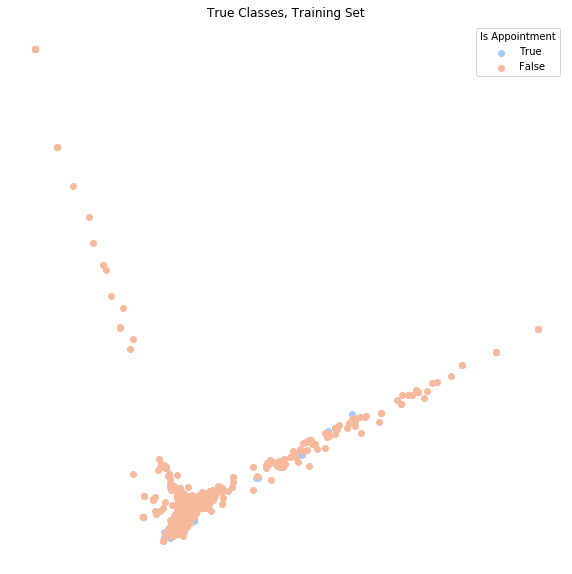

In [25]:
fig, ax = plt.subplots(figsize = (10,10))
ax.axis('off')
pallet = seaborn.color_palette(palette='coolwarm', n_colors = 2)

a = np.stack(train_df[train_df['is_appointment']]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[0], label = "True")

a = np.stack(train_df[train_df['is_appointment'].eq(False)]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[1], label = "False")
    
ax.legend(loc = 'upper right', title = 'Is Appointment')
plt.title('True Classes, Training Set')
plt.show()

As seen in the above graph, PCA does not distinguish well, so we adopt Principal Components.

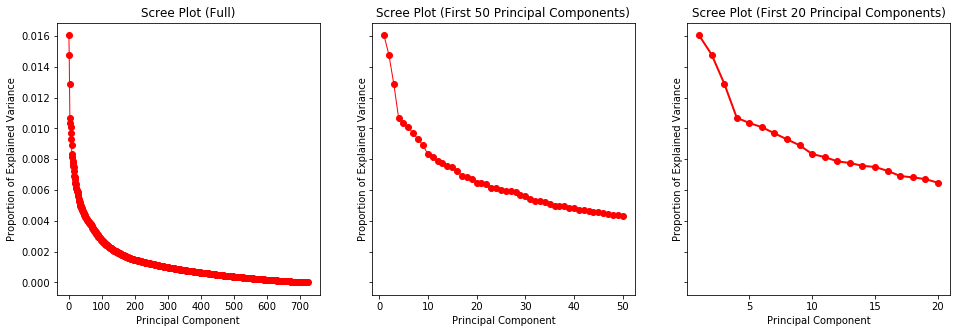

In [30]:
n = len(train_df)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (16, 5), sharey=True)

eigen_vals = np.arange(723) + 1
ax1.plot(eigen_vals, pca.explained_variance_ratio_, 'ro-', linewidth=1)
ax1.set_title('Scree Plot (Full)')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Proportion of Explained Variance')

eigen_vals = np.arange(50) + 1
ax2.plot(eigen_vals, pca.explained_variance_ratio_[:50], 'ro-', linewidth=1)
ax2.set_title('Scree Plot (First 50 Principal Components)')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Proportion of Explained Variance')


eigen_vals = np.arange(20) + 1
ax3.plot(eigen_vals, pca.explained_variance_ratio_[:20], 'ro-', linewidth=2)
ax3.set_title('Scree Plot (First 20 Principal Components)')
ax3.set_xlabel('Principal Component')
ax3.set_ylabel('Proportion of Explained Variance')

plt.show()

So I choose the first 10 principal components as covariates.

In [32]:
train_df['pca_reduced_10'] = train_df['pca'].apply(lambda x: x[:10])

In [33]:
logistic = sklearn.linear_model.LogisticRegression()
logistic.fit(np.stack(train_df['pca_reduced_10'], axis=0), train_df['is_appointment'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
logistic.score(np.stack(train_df['pca_reduced_10'], axis=0), train_df['is_appointment'])

0.832778147901399

In [36]:
TFVects_test = TFVectorizer.transform(test_df['SUMMARY'])
test_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

reduced_data_test = pca.transform(np.stack(test_df['vect'], axis=0))
test_df['pca'] = [r for r in reduced_data_test]
test_df['pca_reduced_10'] = test_df['pca'].apply(lambda x: x[:10])

logistic.score(np.stack(test_df['pca_reduced_10'], axis=0), test_df['is_appointment'])

0.8586666666666667

We can use L1 penalty to see if there could be any performance on 85.7% accuracy. 

In [41]:
logistic_l1= sklearn.linear_model.LogisticRegression(penalty='l2')
logistic_l1.fit(np.stack(train_df['vect'], axis=0), train_df['is_appointment'])
print("Training:")
print(logistic_l1.score(np.stack(train_df['vect'], axis=0), train_df['is_appointment']))
print("Testing:")
print(logistic_l1.score(np.stack(test_df['vect'], axis=0), test_df['is_appointment']))

Training:
0.9007328447701533
Testing:
0.8933333333333333


Improve by around 3 percent, not a big improvement.

In [54]:
lucem_illud_2020.metrics.evaluateClassifier(logistic_l1, test_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.106667,0.717331,0.889213,0.888753,0.993485
True,0.106667,0.717331,0.937500,0.514936,0.441176


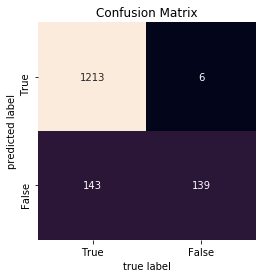

In [62]:
train_df['category'] = train_df['is_appointment']
lucem_illud_2020.plotConfusionMatrix(logistic_l1, train_df)

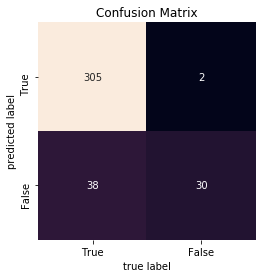

In [52]:
test_df['category'] = test_df['is_appointment']
lucem_illud_2020.plotConfusionMatrix(logistic_l1, test_df)

In [55]:
print('F1-measure:')
print(sklearn.metrics.f1_score(test_df['log_predict'], test_df['category'], average = 'weighted'))

F1-measure:
0.9095794871794872


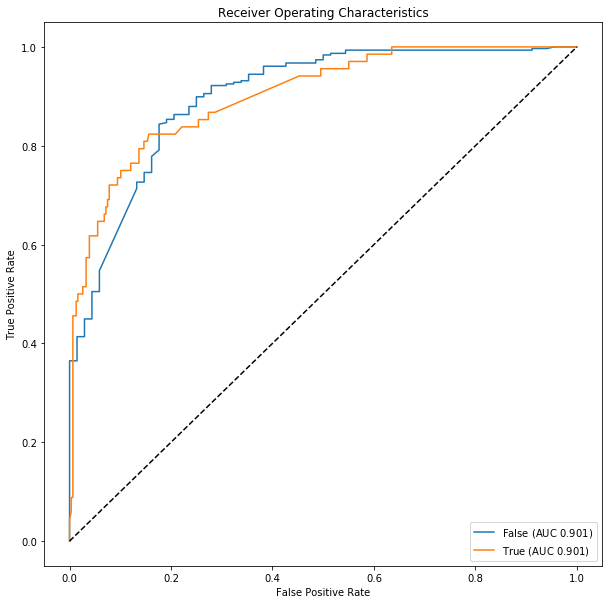

In [56]:
lucem_illud_2020.plotMultiROC(logistic_l1, test_df)

Extrapolate this algorithm to uncoded data

In [108]:
uncoded = pandas.read_csv('E:/Content Analysis/TextClassification_Data.csv', encoding='windows-1252')
uncoded = uncoded[2000:3000]
uncoded.dropna(inplace=True)
uncoded['SUMMARY'] = uncoded['SUMMARY'].apply(lambda x: str(x))
uncoded['tokenized_text'] = uncoded['SUMMARY'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
uncoded['normalized_text'] = uncoded['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

In [121]:
TFVects_uncoded = TFVectorizer.transform(uncoded['SUMMARY'])
uncoded['vect'] = [np.array(v).flatten() for v in TFVects_uncoded.todense()]

In [129]:
TFVects_uncoded.shape 

(929, 723)

In [122]:
uncoded['l1_predict'] = logistic_l1.predict(np.stack(uncoded['vect'], axis=0))
uncoded['l1_predict']

2000    False
2001    False
2002    False
2003    False
2004     True
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Name: l1_predict, Length: 929, dtype: bool

<h1>Naive Bayes</h1>

In [43]:
naiveBayes = sklearn.naive_bayes.BernoulliNB()
naiveBayes.fit(np.stack(train_df['vect'], axis=0), train_df['is_appointment'])

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [44]:
print("Training:")
print(naiveBayes.score(np.stack(train_df['vect'], axis=0), train_df['is_appointment']))
print("Testing:")
print(naiveBayes.score(np.stack(test_df['vect'], axis=0), test_df['is_appointment']))

Training:
0.9060626249167222
Testing:
0.872


In [46]:
test_df['nb_predict'] = naiveBayes.predict(np.stack(test_df['vect'], axis=0))
test_df['nb_predict_prob_true'] = naiveBayes.predict_proba(np.stack(test_df['vect'], axis=0))[:,0]

In [49]:
print('Precision:')
sklearn.metrics.precision_score(test_df['nb_predict'], test_df['is_appointment'])

Precision:


0.4264705882352941

In [50]:
print('Recall:')
sklearn.metrics.recall_score(test_df['nb_predict'], test_df['is_appointment'])

Recall:


0.7631578947368421

In [51]:
print('F1-measure:')
sklearn.metrics.f1_score(test_df['nb_predict'], test_df['is_appointment'])

F1-measure:


0.5471698113207547

In [57]:
lucem_illud_2020.metrics.evaluateClassifier(naiveBayes, test_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.128,0.698577,0.884273,0.882350,0.970684
True,0.128,0.698577,0.763158,0.429464,0.426471


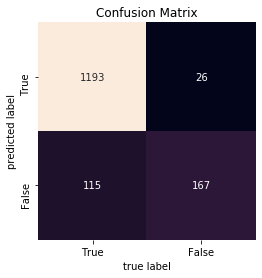

In [61]:
train_df['category'] = train_df['is_appointment']
lucem_illud_2020.plotConfusionMatrix(naiveBayes, train_df)

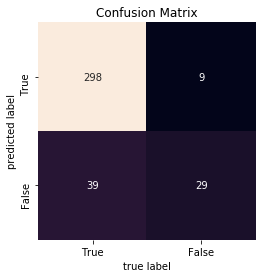

In [58]:
lucem_illud_2020.plotConfusionMatrix(naiveBayes, test_df)

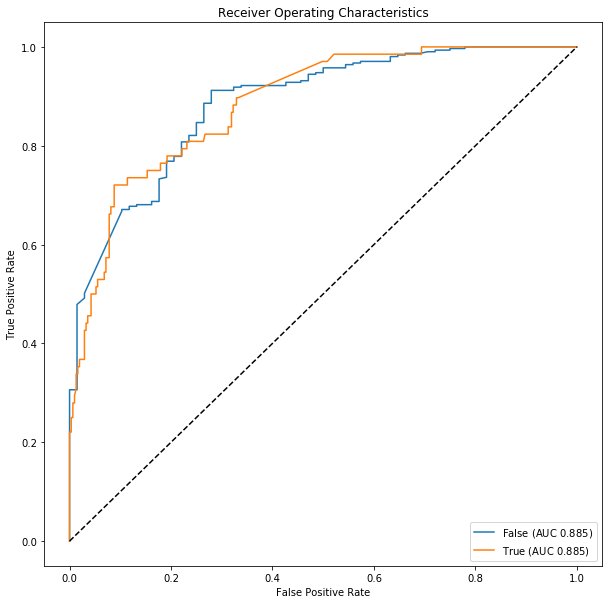

In [59]:
lucem_illud_2020.plotMultiROC(naiveBayes, test_df)

According to the above evaluations, Bayes performs worse than logistic algorithm with lower accuracy and recall.

In [123]:
uncoded['nb_predict'] = naiveBayes.predict(np.stack(uncoded['vect'], axis=0))
uncoded['nb_predict']

2000    False
2001    False
2002     True
2003    False
2004     True
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Name: nb_predict, Length: 929, dtype: bool

## <span style="color:red">*Exercise 3*</span>

<span style="color:red">In the cells immediately following, perform decision tree and random forest classification (binary, multinomial or continuous) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. As with ***Exercise 2***, these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week. Visualize the classification of data points. Calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Now build an ensemble classifier by bagging trees into a random forest. Visualize the result. How do these classifiers perform? What does ensemble learning do?

<h1>Decision Trees</h1>

In [80]:
clf_tree = sklearn.tree.DecisionTreeClassifier(max_depth=4,random_state=0)
clf_tree.fit(np.stack(train_df['vect'], axis=0), train_df['is_appointment'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


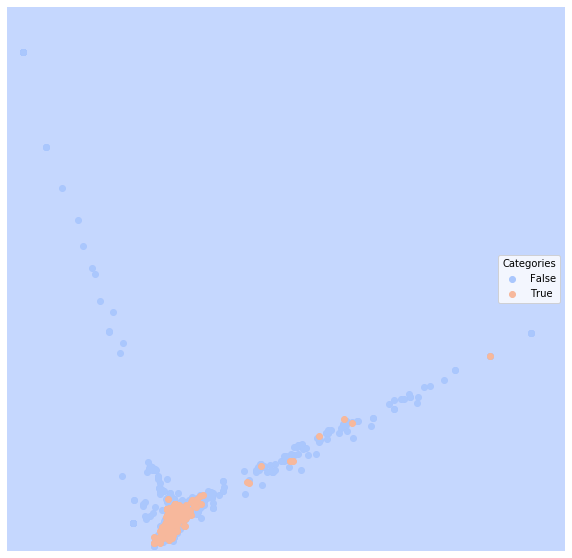

In [81]:
lucem_illud_2020.plotregions(clf_tree, train_df)

In [82]:
lucem_illud_2020.evaluateClassifier(clf_tree, test_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.122667,0.667489,0.871795,0.871622,0.996743
True,0.122667,0.667489,0.958333,0.444142,0.338235


In [83]:
print('F1-measure:')
print(sklearn.metrics.f1_score(test_df['category'],clf_tree.predict(np.stack(test_df['vect'], axis = 0)), average = 'weighted'))

F1-measure:
0.8521013171225936


In [85]:
print('Accuracy:')
sklearn.metrics.accuracy_score(test_df['category'],clf_tree.predict(np.stack(test_df['vect'], axis = 0)))

Accuracy:


0.8773333333333333

With high accuracy and F1 measure, this model performs well

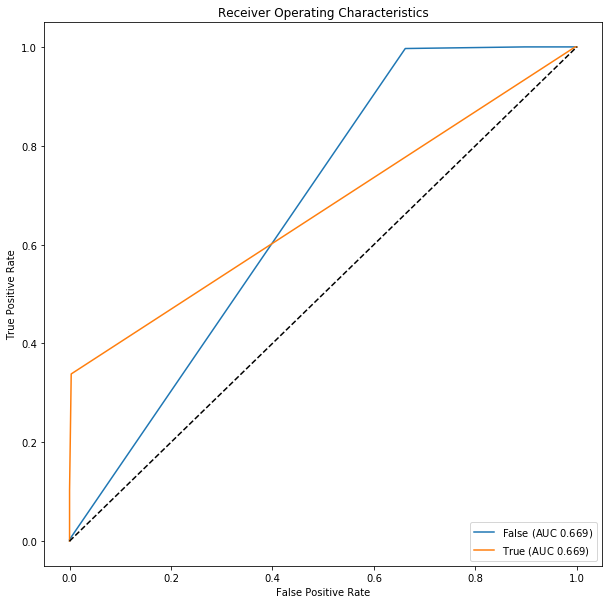

In [84]:
lucem_illud_2020.plotMultiROC(clf_tree, test_df)

In [124]:
uncoded['tree_predict'] = clf_tree.predict(np.stack(uncoded['vect'], axis=0))
uncoded['tree_predict']

2000    False
2001    False
2002    False
2003    False
2004     True
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Name: tree_predict, Length: 929, dtype: bool

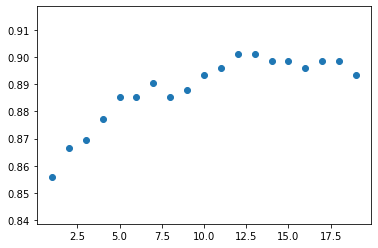

In [86]:
depthvec = []
scorevec = []
for i in range(1,20):
    tree2 = sklearn.tree.DecisionTreeClassifier(max_depth=i,random_state=0)
    tree2.fit(np.stack(train_df['vect'], axis =0), train_df['category'])
    score = sklearn.metrics.accuracy_score(test_df['category'], tree2.predict(np.stack(test_df['vect'], axis = 0)))
    depthvec.append(i)
    scorevec.append(score)
plt.scatter(depthvec,scorevec)
plt.show()

<h1>Random Forest</h1>

In [87]:
tree = sklearn.tree.DecisionTreeClassifier(max_depth=10)

bag = sklearn.ensemble.BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1) 

bag.fit(np.stack(train_df['vect'], axis =0), train_df['category'])

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=10,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,
  

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


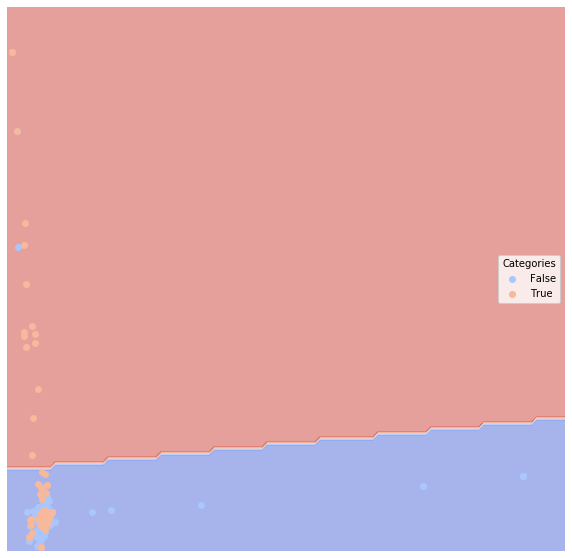

In [88]:
lucem_illud_2020.plotregions(bag, test_df)

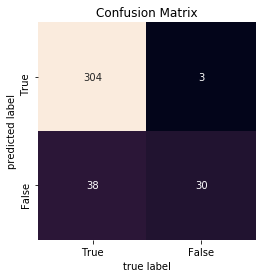

In [89]:
lucem_illud_2020.plotConfusionMatrix(bag, test_df)

In [90]:
lucem_illud_2020.evaluateClassifier(bag, test_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.109333,0.715702,0.888889,0.888203,0.990228
True,0.109333,0.715702,0.909091,0.502403,0.441176


I use the random forest algorithm with 100 decision trees combined together to produce a better classification. Compared with the decision trees algorithm, it has lower error rates and higher AUC.

In [125]:
uncoded['bag_predict'] = bag.predict(np.stack(uncoded['vect'], axis=0))
uncoded['bag_predict']

2000    False
2001    False
2002    False
2003    False
2004     True
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Name: bag_predict, Length: 929, dtype: bool

## <span style="color:red">*Exercise 4*</span>

<span style="color:red">In the cells immediately following, perform and visualize k-nearest neighbor classification using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. Visualize the classification of data points and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC).

In [91]:
n_neighbors = 15
weights="uniform"
clf_knearest = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

In [93]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=80, min_df=2, norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_df['SUMMARY'])
train_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

In [94]:
clf_knearest.fit(np.stack(train_df['vect'], axis = 0), train_df['category'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [95]:
lucem_illud_2020.evaluateClassifier(clf_knearest, train_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.164557,0.56342,0.831967,0.831951,0.99918
True,0.164557,0.56342,0.972973,0.288100,0.12766


In [98]:
TFVects_test = TFVectorizer_ng.transform(test_df['SUMMARY'])
test_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]
test_df['kn_predict'] = clf_knearest.predict(np.stack(test_df['vect'], axis=0))
print("Testing score:")
print(clf_knearest.score(np.stack(test_df['vect'], axis=0), test_df['category']))

Testing score:
0.8453333333333334


In [100]:
print('F1-measure:')
print(sklearn.metrics.f1_score(test_df['category'],clf_knearest.predict(np.stack(test_df['vect'], axis = 0)), average = 'weighted'))

F1-measure:
0.7945036630036632


In [101]:
lucem_illud_2020.evaluateClassifier(clf_knearest, test_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.154667,0.573529,0.841096,0.841096,1.000000
True,0.154667,0.573529,1.000000,0.301725,0.147059


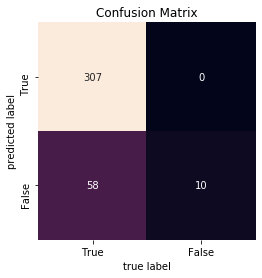

In [99]:
lucem_illud_2020.plotConfusionMatrix(clf_knearest, test_df)

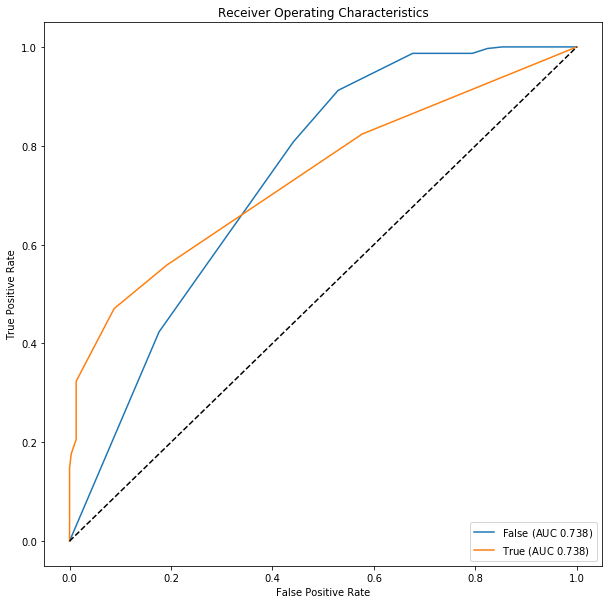

In [102]:
lucem_illud_2020.plotMultiROC(clf_knearest, test_df)

In [130]:
uncoded['kn_predict'] = clf_tree.predict(np.stack(uncoded['vect'], axis=0))
uncoded['kn_predict']

2000    False
2001    False
2002    False
2003    False
2004     True
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Name: kn_predict, Length: 929, dtype: bool

## <span style="color:red">*Exercise 5*</span>

<span style="color:red">In the cells immediately following, perform a neural network classification and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). How does this classify relevant to *k*-nearest neighbor, Naive Bayes, logistic and decision-tree approaches?

In [103]:
clf_nn = sklearn.neural_network.MLPClassifier()
clf_nn.fit(np.stack(train_df['vect'], axis=0), train_df['category'])

S:\Python-64\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [104]:
lucem_illud_2020.evaluateClassifier(clf_nn, test_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.12,0.800776,0.928105,0.919906,0.925081
True,0.12,0.800776,0.666667,0.509647,0.676471


In [105]:
print('F1-measure:')
print(sklearn.metrics.f1_score(test_df['category'],clf_nn.predict(np.stack(test_df['vect'], axis = 0)), average = 'weighted'))

F1-measure:
0.880340076922161


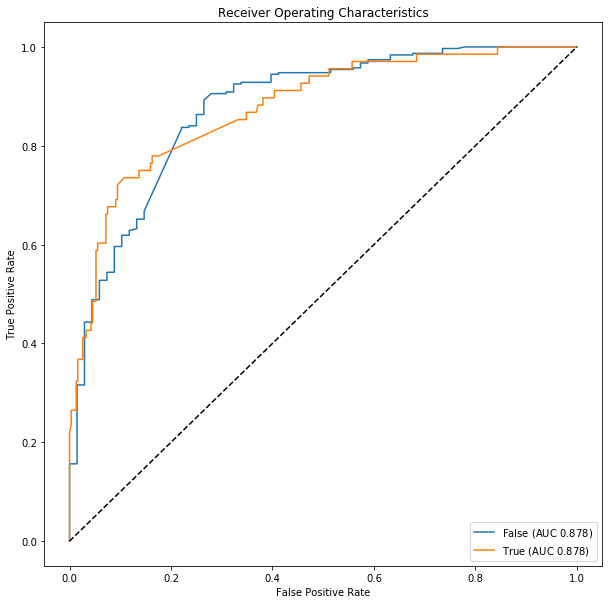

In [106]:
lucem_illud_2020.plotMultiROC(clf_nn, test_df)

In [131]:
uncoded['nn_predict'] = clf_nn.predict(np.stack(uncoded['vect'], axis=0))
uncoded['nn_predict']

2000    False
2001    False
2002    False
2003    False
2004     True
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Name: nn_predict, Length: 929, dtype: bool

In my opinion, logistic regression suits the situation where the class boundary is linear, especially when classification is binary. Naive Bayes can perform the best when all the features are independent, but can still make a good performance when the number of features is limited. K-nearest algorithm cannot be applied to the situation where data points are scattered, which means that they keep a long distance from each other. As regards decision trees, this algorithm is unstable and too many layers can make it easily stump into overfitting. And it performs badly when dealing with categorical predictors. Neural network, from my perspective, is relatively complex and can handle many practical situations as the empirical datasets, but still, it cannot avoid the problem of overfitting considering its dependence on training data.